In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Flight_On_Time_Data.csv")
df.head()

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,...,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,...,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,...,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,...,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,...,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

# Data Cleaning and Preparation

Removing some variables because they contain information on the actual delay of the flight

In [4]:
# Will have information leakage from the following columns
df.drop(['Actual_Dep_Time','Dep_Time_Offset','Dep_Delay_Minutes','Actual_Arr_Time','Arr_Time_Offset',
         'Arr_Delay_Minutes','Arr_Delay_At_Least_15_Minutes','Actual_Gate_to_Gate_Time','Carrier_Delay',
         'Weather_Delay','National_Aviation_System_Delay','Security_Delay','Late_Aircraft_Delay',
         'Actual_Gate_to_Gate_Time','Time_Airborne'], axis=1, inplace=True)

# Already have the date column so no need for this
df.drop(['Quarter','Year','Month'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  26


In [36]:
df.rename(columns={'Dep_Delay_At_Least_15_Minutes':'delayed'}, inplace=True)

In [38]:
df.columns

Index(['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date',
       'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time', 'delayed',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Flight_Cancelled',
       'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group'],
      dtype='object')

# General Statistics

About 20% of flights were delayed

Dep_Delay_At_Least_15_Minutes
0    79.748887
1    20.251113
Name: count, dtype: float64


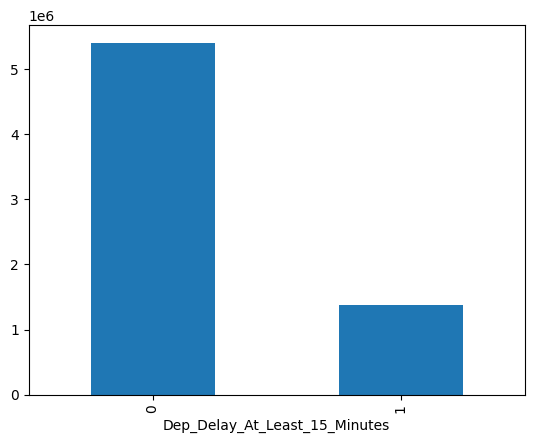

In [18]:
df['delayed'].value_counts().plot(kind='bar')
print((df['delayed'].value_counts()/df.shape[0]) * 100)

Lets see which aircrafts and locations are responsible for the most delays

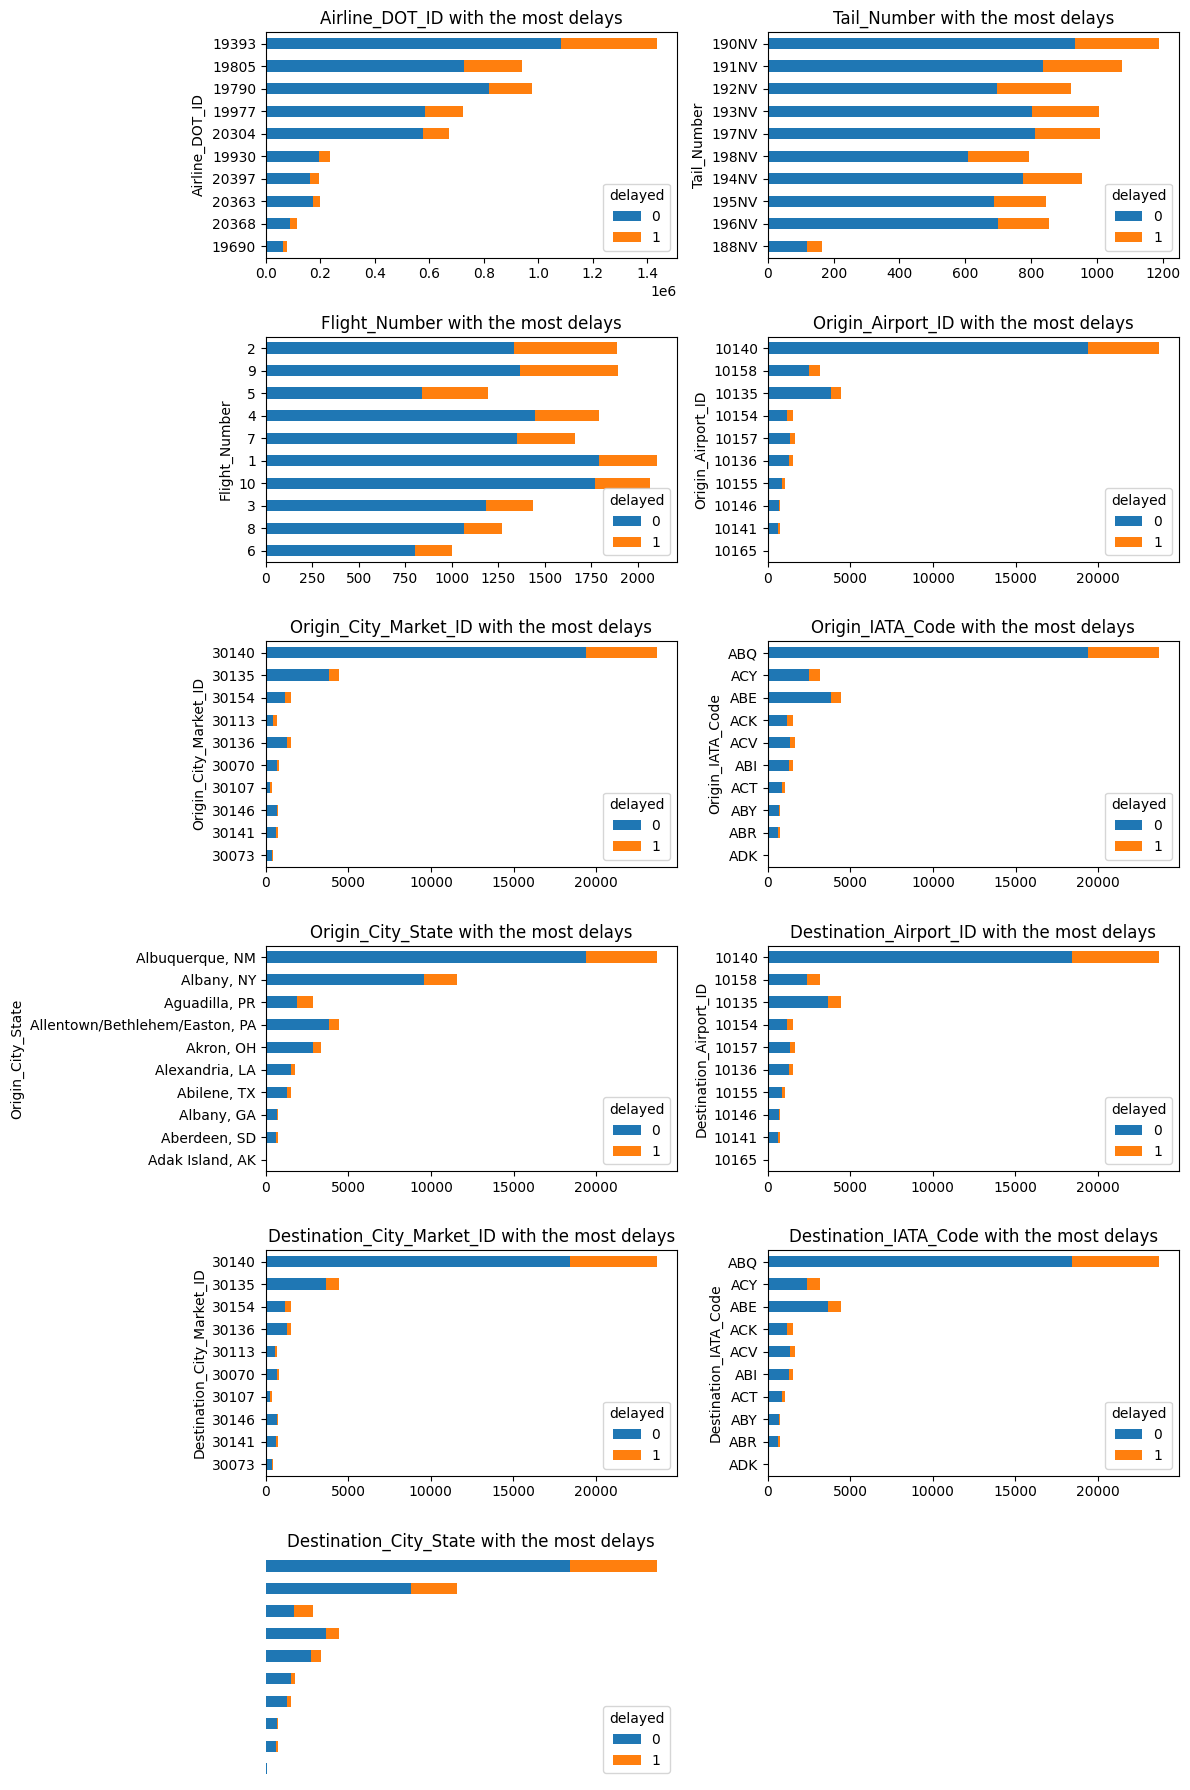

In [44]:
cols = ['Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State']


fig, axes = plt.subplots(nrows=int((len(cols) - 1) / 2) + 1, ncols=2, figsize=(12, 18))

# Flatten axes in case there's only one row
axes = axes.ravel()

for i, col in enumerate(cols):
    try:
        # Try to plot on current subplot
        df.groupby([col, 'delayed']).size().unstack().head(10).sort_values(by=1).plot(kind='barh', stacked=True, ax=axes[i])
        axes[i].set_title(f'{col} with the most delays')
    except IndexError:
        # If all subplots are used, break the loop
        break

# Make sure any unused axes don't have titles or labels
for ax in axes[i:]:
    ax.axis('off')

plt.tight_layout()
plt.show()